<a href="https://colab.research.google.com/github/Kingestif/Data-Preprocessing-Dimensionality-Reduction-/blob/main/Data_Preprocessing_%26_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic Dataset**

In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('train.csv')

# Preview the dataset
print("First 5 rows:\n", df.head())

# Check for missing values
print("\nMissing Values:\n")
missing_cols = df.isnull().sum()
missing_cols = missing_cols[missing_cols > 0]
print(missing_cols)

Saving train.csv to train.csv
First 5 rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0  

## 1. Handling missing data

In [ ]:
# 1: Impute missing values
# Numerical columns: Fill with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# 2: Mode for Categorical (embarked & cabin)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])

# Check for missing values again must be 0 for all
print("\nMissing Values:\n")
print(df.isnull().sum())


Missing Values:

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


## 2. Encoding

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 1. Label encoding (Sex)
# AUTOMATIC LABEL ENCODING
encoder = LabelEncoder()
df['Sex_encoded'] = encoder.fit_transform(df['Sex'])
print(df[['Name','Sex', 'Sex_encoded']])

# 2. AUTOMATIC ONE-HOT ENCODING (Cabin, Embarked)
df_encoded = pd.get_dummies(df, columns=['Embarked', 'Cabin'], prefix=['Embark', 'Cabin'])
print("\nAutomatic One-Hot Encoding Result:")
display(df_encoded)

                                                  Name     Sex  Sex_encoded
0                              Braund, Mr. Owen Harris    male            1
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female            0
2                               Heikkinen, Miss. Laina  female            0
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female            0
4                             Allen, Mr. William Henry    male            1
..                                                 ...     ...          ...
886                              Montvila, Rev. Juozas    male            1
887                       Graham, Miss. Margaret Edith  female            0
888           Johnston, Miss. Catherine Helen "Carrie"  female            0
889                              Behr, Mr. Karl Howell    male            1
890                                Dooley, Mr. Patrick    male            1

[891 rows x 3 columns]

Automatic One-Hot Encoding Result:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,False,False,False,False,False,False,False,False,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,False,False,False,False,False,False,False,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,False,False,False,False,False,False,False,False,False,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,False,False,False,False,False,False,False,False,False,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,False,False,False,False,False,False,False,False,False,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,...,False,False,False,False,False,False,False,False,False,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,False,False,False,False,False,False,False,False,False,False


## 3. Outlier detection

DataFrame Shape: (891, 13)

Q1: 7.9104
Q3: 31.0
IQR: 23.0896

Outliers Shape: (116, 13)


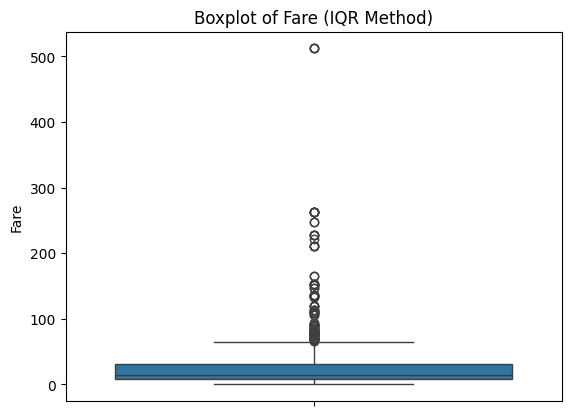

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate Q1, Q3, and IQR for the 'Fare' column
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = df[(df['Fare'] < Q1 - 1.5 * IQR) | (df['Fare'] > Q3 + 1.5 * IQR)]

print("DataFrame Shape:", df.shape)

print("\nQ1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("\nOutliers Shape:", outliers.shape) #number of outliers from our original data


#Visual plotting
sns.boxplot(df['Fare'])
plt.title("Boxplot of Fare (IQR Method)")
plt.show()

## 4. Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


scaler = StandardScaler()
numeric_features = ['Age', 'Fare']
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Check the result
print(df[numeric_features].describe())

                Age          Fare
count  8.910000e+02  8.910000e+02
mean   2.272780e-16  3.987333e-18
std    1.000562e+00  1.000562e+00
min   -2.224156e+00 -6.484217e-01
25%   -5.657365e-01 -4.891482e-01
50%   -1.046374e-01 -3.573909e-01
75%    4.333115e-01 -2.424635e-02
max    3.891554e+00  9.667167e+00


## 5. Again Outlier Detection after feature scaling


Outliers in 'Age' after scaling:


,Age
96,3.199906
116,3.161481
493,3.199906
630,3.891554
672,3.123056
745,3.123056
851,3.430455



Outliers in 'Fare' after scaling:


,Fare
27,4.647001
88,4.647001
118,4.335332
258,9.667167
299,4.335332
311,4.634417
341,4.647001
377,3.610065
380,3.932723
438,4.647001


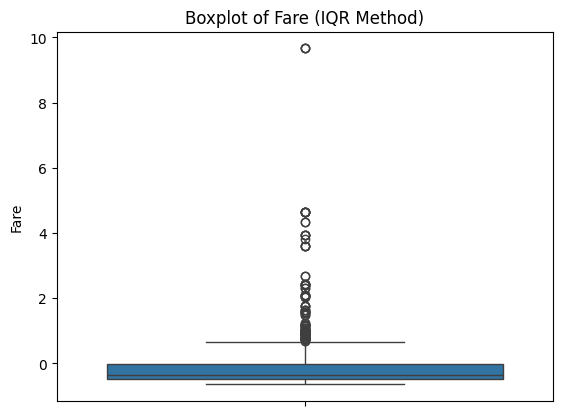

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Detect outliers based on Z-score
z_threshold = 3

# For each numeric column, find rows where |z| > 3
for col in numeric_features:
    outliers = df[np.abs(df[col]) > z_threshold]
    print(f"\nOutliers in '{col}' after scaling:")
    display(outliers[[col]])


#Visual plotting
sns.boxplot(df['Fare'])
plt.title("Boxplot of Fare (IQR Method)")
plt.show()

## 6. Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train set:", X_train.shape)
print("Test set:", X_test.shape)


Train set: (712, 12)
Test set: (179, 12)


# **House Price Prediction**

In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('train.csv')

# Preview the dataset
print("First 5 rows:\n", df.head())

# Check for missing values
print("\nMissing Values:\n")
missing_cols = df.isnull().sum()
missing_cols = missing_cols[missing_cols > 0]
print(missing_cols)

Saving train.csv to train.csv
First 5 rows:
    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  Sal

## Handling Missing Data

In [ ]:
# 1: Impute missing values
# Numerical columns: Fill with median
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())

# 2: Mode for Categorical (embarked & cabin)
cat_none = [
    'Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'PoolQC', 'Fence', 'MiscFeature'
]

# If The feature is physically missing in reality for ex some houses dont have Alley access so used None to represent that
df[cat_none] = df[cat_none].fillna("None")

# Here electrical is missing not becuase the house dont have one but some entry issue so used mode to fill it
df["Electrical"] = df["Electrical"].fillna(df["Electrical"].mode()[0])

# Check for missing values again must be 0 for all
print("\nMissing Values:\n")
missing_cols = df.isnull().sum()
missing_cols = missing_cols[missing_cols > 0]
print(missing_cols)


Missing Values:

Series([], dtype: int64)


## Encoding

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

ordinal_features = {
    'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtQual': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtCond': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtExposure': ['None', 'No', 'Mn', 'Av', 'Gd'],
    'BsmtFinType1': ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'BsmtFinType2': ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'FireplaceQu': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageFinish': ['None', 'Unf', 'RFn', 'Fin'],
    'GarageQual': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageCond': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'PoolQC': ['None', 'Fa', 'TA', 'Gd', 'Ex'],
    'Fence': ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'],
    'PavedDrive': ['N', 'P', 'Y'],
    'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']
}

nominal_features = [
    'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
    'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir',
    'Electrical', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition'
]

# 1. MANUAL LABEL ENCODING since we have manually ordered the dictionaryy
for feature, order in ordinal_features.items():
    order_mapping = {category: i for i, category in enumerate(order)}
    df[feature] = df[feature].map(order_mapping)

print(df.columns.tolist())

print("\nEncoded Ordinal Columns Sample:")
print(df[list(ordinal_features.keys())].head())

# 2. AUTOMATIC ONE-HOT ENCODING for Nominal
df = pd.get_dummies(df, columns=nominal_features, drop_first=True)

print("\nAutomatic One-Hot Encoding Result:")
display(df)

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,3,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,2,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,3,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,2,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,3,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,2,...,False,False,False,False,True,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,2,...,False,False,False,False,True,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,4,...,False,False,False,False,True,False,False,False,True,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,2,...,False,False,False,False,True,False,False,False,True,False


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Step 1: Choose numeric columns (exclude target)
numerical_cols = df.select_dtypes(include=[np.number]).drop('SalePrice', axis=1).columns

# Step 2: Initialize and fit scaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df[numerical_cols])

            Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0    -1.730865    0.073375    -0.220875 -0.207142     0.651479    -0.517200   
1    -1.728492   -0.872563     0.460320 -0.091886    -0.071836     2.179628   
2    -1.726120    0.073375    -0.084636  0.073480     0.651479    -0.517200   
3    -1.723747    0.309859    -0.447940 -0.096897     0.651479    -0.517200   
4    -1.721374    0.073375     0.641972  0.375148     1.374795    -0.517200   
...        ...         ...          ...       ...          ...          ...   
1455  1.721374    0.073375    -0.357114 -0.260560    -0.071836    -0.517200   
1456  1.723747   -0.872563     0.687385  0.266407    -0.071836     0.381743   
1457  1.726120    0.309859    -0.175462 -0.147810     0.651479     3.078570   
1458  1.728492   -0.872563    -0.084636 -0.080160    -0.795151     0.381743   
1459  1.730865   -0.872563     0.233255 -0.058112    -0.795151     0.381743   

      YearBuilt  YearRemodAdd  MasVnrArea  ExterQua

## PCA Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA

# Step 1: Separate target
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Step 2: Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(X)

# Step 3: Check result
print("Original shape:", X.shape)
print("Reduced shape:", X_pca.shape)


Original shape: (1460, 206)
Reduced shape: (1460, 57)


## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# We used X_pca reduced features not original bulky features, first Split the PCA-transformed features and the target variable
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (1168, 57)
Test shape: (292, 57)


# **Iris Species Dataset**

In [ ]:
import seaborn as sns
import pandas as pd

# Load the iris dataset
df = sns.load_dataset('iris')

# Preview the dataset
print(df.head())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


## Check for Missing values

In [ ]:
# Check if there is null values
print(df.isnull().sum())


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


## Encoding Categorical Column

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['species_encoded'] = encoder.fit_transform(df['species'])

print(df)

     sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     species_encoded  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])
df[features] = scaled_features

print(df[features])


     sepal_length  sepal_width  petal_length  petal_width
0       -0.900681     1.019004     -1.340227    -1.315444
1       -1.143017    -0.131979     -1.340227    -1.315444
2       -1.385353     0.328414     -1.397064    -1.315444
3       -1.506521     0.098217     -1.283389    -1.315444
4       -1.021849     1.249201     -1.340227    -1.315444
..            ...          ...           ...          ...
145      1.038005    -0.131979      0.819596     1.448832
146      0.553333    -1.282963      0.705921     0.922303
147      0.795669    -0.131979      0.819596     1.053935
148      0.432165     0.788808      0.933271     1.448832
149      0.068662    -0.131979      0.762758     0.790671

[150 rows x 4 columns]


## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


# **Diabetes Health Indicators**

In [1]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')


# Preview the dataset
print("First 5 rows:\n", df.head())

# Check for missing values
print("\nMissing Values:\n")
missing_cols = df.isnull().sum()
missing_cols = missing_cols[missing_cols > 0]
print(missing_cols)


Saving diabetes_binary_5050split_health_indicators_BRFSS2015.csv to diabetes_binary_5050split_health_indicators_BRFSS2015.csv
First 5 rows:
    Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   No

## No Missing Values, No Encoding needed since features are in numerical form

## Scaling

In [2]:
from sklearn.preprocessing import StandardScaler

X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled_df.head())

     HighBP  HighChol  CholCheck       BMI    Smoker    Stroke  \
0  0.880201 -1.052798   0.159276 -0.542176 -0.951711 -0.257473   
1  0.880201  0.949850   0.159276 -0.542176  1.050740  3.883895   
2 -1.136104 -1.052798   0.159276 -0.542176 -0.951711 -0.257473   
3  0.880201  0.949850   0.159276 -0.261036  1.050740 -0.257473   
4 -1.136104 -1.052798   0.159276 -0.120466  1.050740 -0.257473   

   HeartDiseaseorAttack  PhysActivity    Fruits   Veggies  ...  AnyHealthcare  \
0              -0.41647      0.649925 -1.255371  0.517485  ...       0.217175   
1              -0.41647     -1.538638  0.796577 -1.932424  ...       0.217175   
2              -0.41647      0.649925  0.796577  0.517485  ...       0.217175   
3              -0.41647      0.649925  0.796577  0.517485  ...       0.217175   
4              -0.41647      0.649925  0.796577  0.517485  ...       0.217175   

   NoDocbcCost   GenHlth  MentHlth  PhysHlth  DiffWalk       Sex       Age  \
0    -0.321945  0.146304  0.153020  2.

## PCA For Dimension Reduction

In [3]:
from sklearn.decomposition import PCA

# Step 1: Separate target
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Step 2: Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(X)

# Step 3: Check result
print("Original shape:", X.shape)
print("Reduced shape:", X_pca.shape)


Original shape: (70692, 21)
Reduced shape: (70692, 4)


## Train Test Split

In [4]:
from sklearn.model_selection import train_test_split

# Train-test split after PCA
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (56553, 4)
Test shape: (14139, 4)
